# Exploratory Data Analysis - Spotify Dataset
A fundamental part of this work is to identify the type of data and all the characteristics they have. In this way it will be possible to identify what transformations are necessary to perform in a next process, these transformations are not directly in this EDA, here are some processes to perform the transformations and thus effectively create the Data Pipeline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the csv
We will start by reading the dataset and briefly examining the data it contains. Recall that in this case, it is easily read as a csv.

In [2]:
df = pd.read_csv("../data/spotify_dataset.csv")
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Columns

In [3]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

##### Description of columns: 
- ***Unnamed: 0:*** This column appears to have been created automatically when downloading the data, as the original set lacked this column. It functions as a default sequential ID, providing a unique identifier for each entry in the data set.
- ***track_id:*** Spotify ID of the track in the dataset.
- ***artists:*** The names of the artists who performed the track. If there is more than one artist, they are separated by a ; (semicolons).
- ***album_name:*** Name of the album the track is included in.
- ***track_name:*** Name of the track.
- ***popularity:*** Numerical value between 0 and 100 indicating the popularity of a track, with 100 being the highest value.
- ***duration_ms:*** Track duration in milliseconds.
- ***explicit:*** If the hint has explicit letters or not (true = yes, false = no, no OR unknown)
- ***danceability:*** describes how suitable a track is for dancing, a value of 0.0 is the least danceable and 1.0 is the most danceable.
- ***energy:*** Energy is a measure of 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- ***key:*** The key in which the track is located. Integers are assigned to tones using standard tone class notation. For example 0 = C, 1 = C♯/D♭, 2 = D, etc. If no key was detected, the value is -1.
- ***loudness:*** The overall loudness of a track in decibels (dB).
- ***mode:*** Mode indicates the mode (major or minor) of a track, the scale from which its melodic content is derived. Major is represented by 1 and minor is 0. 
- ***speechiness:*** detects the presence of spoken words in a track. Values below 0.33 are likely to be non-speech tracks. Values between 0.33 and 0.66 describe tracks that may contain both music and speech. Values above 0.66 describe tracks that are likely to be composed of spoken words only.
- ***acousticness:*** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.
- ***instrumentalness:*** The closer the instrumentalness value is to 1.0, the higher the probability that the track contains no vocal content.
- ***liveness:*** Detects the presence of an audience in the recording. A high value means a higher probability that the track was played live. Values range from 0.0 - 1.0
- ***valence:*** A measure from 0.0 to 1.0 that describes the musical positivity transmitted by a track.
- ***tempo:*** The estimated overall tempo of a track in beats per minute (BPM).
- ***time_signature:*** Is an estimated time signature. The time signature varies from 3 to 7, which indicates time signatures from 3/4 to 7/4.
- ***track_genre:*** The genre to which the track belongs.

*If you want to see more detailed information about the dataset or about the columns, at the end of the notebook you will find the references with the dataset.*

Count of rows and columns to know how much data there are

In [4]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 114000 rows and 21 columns.


Data dictionary to identify the number of null values, data types and unique values.

In [5]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)

         Column Name Data Type  Null Values  Unique Values
0         Unnamed: 0     int64            0         114000
1           track_id    object            0          89741
2            artists    object            1          31437
3         album_name    object            1          46589
4         track_name    object            1          73608
5         popularity     int64            0            101
6        duration_ms     int64            0          50697
7           explicit      bool            0              2
8       danceability   float64            0           1174
9             energy   float64            0           2083
10               key     int64            0             12
11          loudness   float64            0          19480
12              mode     int64            0              2
13       speechiness   float64            0           1489
14      acousticness   float64            0           5061
15  instrumentalness   float64            0           53

Here we can see that we have several types of data and also 3 columns with a null value

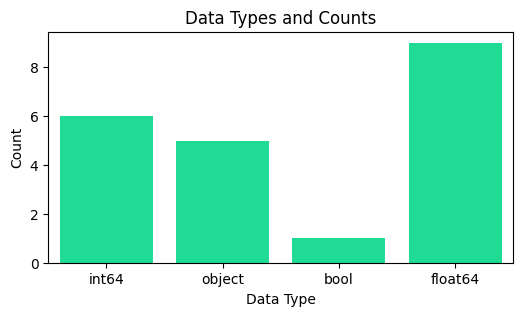

In [6]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Data Type', data=info_table, color='mediumspringgreen')
plt.title('Data Types and Counts')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

According to this diagram the types of each column with raw data are as follows: 
- *intergers:* 6
- *object:* 5
- *boolean:* 1
- *float:* 9 


### Delete column that will not be used
In this case the Unnamed column was removed, which according to the description is the id that was created when loading the data, but this ID column is not needed. In addition, when checking for duplicate values and this column was present, no duplicate values appeared, but when it was eliminated, they were identifiable.

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Descriptive analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


We can tell a few things from this: 
- Initially we observe that all columns have a count of 114000 since that is the amount of data. 
- Popularity has a range from 0 to 100. The mean popularity is about 33.24, suggesting that the songs have moderate popularity overall.
- The average song duration is about 228,030 milliseconds (approximately 3 minutes and 48 seconds), and has a fairly high standard deviation, indicating a wide variability in song duration.
- Musical characteristics such as danceability, energy, and valence have moderate means. This suggests that the songs in general have a medium level of these characteristics, making them suitable for dancing and potentially enjoyable in terms of energy and emotion.
- The mean values and standard deviations for Loudness, Speechiness, Acousticness vary, indicating a diversity in musical content.

In [9]:
# descriptive statistics for categorical variables only
df.describe(include='object').T

,count,unique,top,freq
track_id,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
track_genre,114000,114,acoustic,1000


We note that:
- track_id: There are a total of 89,740 unique values. The identifier "6S3JlDAGk3uu3NtZbPnuhS" appears most frequently, 9 times.
- artists: There are a total of 31,437 unique values. "The Beatles" is the most common artist, appearing 279 times.
- album_name: There are a total of 46,589 unique values. "Alternative Christmas 2022" is the most common album name, appearing 195 times.
- track_name: There are a total of 73,608 unique values. "Run Rudolph Run" is the most common track name, appearing 151 times.
- track_genre: There are 114 unique genres. "Acoustic" is the most common genre, appearing 1000 times.

### Null values
As can be seen in the data dictionary there is a null value, this was eliminated since its information has no value because we do not have the key data to know which album or artist it is, and the rest of the values do not provide valuable information. 

In [10]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Delete null values
In this case we delete the row by track id to make sure that this is the deleted row and not compromise the rest of the data.

In [11]:
rows_to_drop = df[df['track_id'] == '1kR4gIb7nGxHPI3D2ifs59'].index
df = df.drop(rows_to_drop)

Now with another data dictionary we verify that the null value is no longer present.

In [12]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)

         Column Name Data Type  Null Values  Unique Values
0           track_id    object            0          89740
1            artists    object            0          31437
2         album_name    object            0          46589
3         track_name    object            0          73608
4         popularity     int64            0            101
5        duration_ms     int64            0          50696
6           explicit      bool            0              2
7       danceability   float64            0           1174
8             energy   float64            0           2083
9                key     int64            0             12
10          loudness   float64            0          19480
11              mode     int64            0              2
12       speechiness   float64            0           1489
13      acousticness   float64            0           5061
14  instrumentalness   float64            0           5346
15          liveness   float64            0           17

### Check duplicate values
As mentioned above, it was important to remove the Unnamed column in order to see the duplicates. 

In [13]:
df[df.duplicated(keep=False)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2109,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3683,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112931,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish
113295,5WaioelSGekDk3UNQy8zaw,Matt Redman,Sing Like Never Before: The Essential Collection,Our God - New Recording,34,265373,False,0.487,0.895,11,-5.061,1,0.0413,0.000183,0.000000,0.3590,0.384,105.021,4,world-music


Here it is showing me the duplicates and the number of times that duplicate is repeated, so it says that there are 894 duplicates, but we need to look at the single duplicate data. 

In [14]:
df.loc[df.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


We can now identify that in total there are 450 duplicate values that are exactly the same for all columns. 
But to confirm this let's check some track_id to verify that this is correct

Confirmation of duplicates by track_id

In [15]:
rows_track_id = df[df['track_id'] == '0CDucx9lKxuCZplLXUz0iX']
print(rows_track_id.to_string(index=False))

              track_id                artists album_name       track_name  popularity  duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo  time_signature track_genre
0CDucx9lKxuCZplLXUz0iX Buena Onda Reggae Club    Disco 2 Song for Rollins          16       219346     False         0.841   0.577    0    -7.544     1       0.0438         0.238              0.86    0.0571    0.843 90.522               4    afrobeat
0CDucx9lKxuCZplLXUz0iX Buena Onda Reggae Club    Disco 2 Song for Rollins          16       219346     False         0.841   0.577    0    -7.544     1       0.0438         0.238              0.86    0.0571    0.843 90.522               4    afrobeat


Here we can see that the data is repeated with exactly the same information

In [16]:
rows_track_id = df[df['track_id'] == '2aibwv5hGXSgw7Yru8IYTO']
print(rows_track_id.to_string(index=False))

              track_id               artists       album_name    track_name  popularity  duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature track_genre
2aibwv5hGXSgw7Yru8IYTO Red Hot Chili Peppers Stadium Arcadium Snow (Hey Oh)          80       334666     False         0.427     0.9   11    -3.674     1       0.0499         0.116          0.000017     0.119    0.599 104.655               4    alt-rock
2aibwv5hGXSgw7Yru8IYTO Red Hot Chili Peppers Stadium Arcadium Snow (Hey Oh)          80       334666     False         0.427     0.9   11    -3.674     1       0.0499         0.116          0.000017     0.119    0.599 104.655               4    alt-rock
2aibwv5hGXSgw7Yru8IYTO Red Hot Chili Peppers Stadium Arcadium Snow (Hey Oh)          80       334666     False         0.427     0.9   11    -3.674     1       0.0499         0.116          0.000017     0.119    0.599 104.655             

But in this one it is important to highlight that the data is repeated once with the same information, but it is repeated another 4 times because the track_genre is different. 

### Delete duplicates
At this point the decision was taken to eliminate the 450 duplicates, since they are not contributing and could alter the information because it is information that is being repeated. 


It is also important to mention that we did not look at the duplicates by track_id, since as we saw before there are track_id with different track_genre, this is the reason for the repetition. 
But in this case only the 450 that are totally repeated in all attributes will be eliminated. 

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 113549 rows and 20 columns.


After eliminating duplicate values we have 113549 rows and 20 columns (due to the elimination of Unnamed).

I wanted to check the number of times a track_id is repeated.

In [19]:
df['track_id'].value_counts()

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
2qgXrzJsry4KgYoJCpuaul    7
0RSGPiykniIg8m7JhiAVv7    7
                         ..
22Lhq4mVPFWv3bjchAFDOl    1
0oz9ITtPIt3iI1nzdVX9L2    1
1qFmSPALGSoqjbwM3br4Rl    1
1PTt5Oa80JGSBCrzzfhtn6    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64

In this case we see that there is a track_id that is repeated 9 times, so we verify that it is possibly not a duplicate and the elimination process has failed. 

In [20]:
rows_track_id = df[df['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']
print(rows_track_id.to_string(index=False))

              track_id   artists                                     album_name                  track_name  popularity  duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  time_signature       track_genre
6S3JlDAGk3uu3NtZbPnuhS Badfinger Straight Up (Remastered 2010 / Deluxe Edition) Baby Blue - Remastered 2010          67       217346     False         0.623   0.876   11    -7.788     1        0.066        0.0189            0.0134    0.0728    0.515 124.431               4             blues
6S3JlDAGk3uu3NtZbPnuhS Badfinger Straight Up (Remastered 2010 / Deluxe Edition) Baby Blue - Remastered 2010          67       217346     False         0.623   0.876   11    -7.788     1        0.066        0.0189            0.0134    0.0728    0.515 124.431               4           country
6S3JlDAGk3uu3NtZbPnuhS Badfinger Straight Up (Remastered 2010 / Deluxe Edition) Baby Blue - Remastered 2010          67     

When verifying the track_id, we see that it is repeated 9 times because it has different track_gender, and not because it is duplicated. A process with the gender will be done later. 

### Column artists
Now let's explore the artists column, where we see the number of artists and the 10 most frequent artists, along with the number of occurrences of each.

In [21]:
top_artists = df['artists'].value_counts().head(10)
top_artists

artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Prateek Kuhad      217
Feid               201
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

In [22]:
artist_info = df[df['artists'] == 'The Beatles']
artist_info

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
11016,6dGnYIeXmHdcikdzNNDMm2,The Beatles,Abbey Road (Remastered),Here Comes The Sun - Remastered 2009,82,185733,False,0.557,0.540,9,-10.484,1,0.0347,0.0339,0.00248,0.1790,0.394,129.171,4,british
11017,3BQHpFgAp4l80e1XslIjNI,The Beatles,Help! (Remastered),Yesterday - Remastered 2009,76,125666,False,0.332,0.179,5,-11.830,1,0.0326,0.8790,0.00000,0.0886,0.315,96.529,4,british
11018,7iN1s7xHE4ifF5povM6A48,The Beatles,Let It Be (Remastered),Let It Be - Remastered 2009,77,243026,False,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.00000,0.1110,0.410,143.462,4,british
11052,1eT2CjXwFXNx6oY5ydvzKU,The Beatles,Love,Hey Jude,66,238854,False,0.462,0.632,5,-7.438,1,0.0248,0.0910,0.00000,0.3970,0.585,74.268,4,british
11055,2EqlS6tkEnglzr7tkKAAYD,The Beatles,Abbey Road (Remastered),Come Together - Remastered 2009,77,259946,False,0.533,0.376,9,-11.913,0,0.0393,0.0302,0.24800,0.0926,0.187,165.007,4,british
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84969,70HNt0eoBVqr4ss68U8x3B,The Beatles,Help! (Remastered),You're Going To Lose That Girl - Remastered 2009,55,138666,False,0.533,0.660,4,-7.694,1,0.0337,0.3460,0.00000,0.2600,0.818,131.975,4,psych-rock
84978,1swmf4hFMJYRNA8Rq9PVaW,The Beatles,The Beatles (Remastered),Martha My Dear - Remastered 2009,54,148573,False,0.472,0.292,10,-11.591,1,0.0321,0.8720,0.00070,0.1280,0.824,177.624,4,psych-rock
91611,6dGnYIeXmHdcikdzNNDMm2,The Beatles,Abbey Road (Remastered),Here Comes The Sun - Remastered 2009,82,185733,False,0.557,0.540,9,-10.484,1,0.0347,0.0339,0.00248,0.1790,0.394,129.171,4,rock
91807,7iN1s7xHE4ifF5povM6A48,The Beatles,Let It Be (Remastered),Let It Be - Remastered 2009,77,243026,False,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.00000,0.1110,0.410,143.462,4,rock


One reason why artists are so frequent is because these artists have many songs, many albums or their songs cover many genres and this causes them to generate a very high level of frequencies. 

### Column album_name
For this column we are going to identify the 10 albums with the highest number of occurrences in the data set

In [23]:
top_albums = df['album_name'].value_counts().head(10)
top_albums

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    180
Metal                          143
Halloween con perreito         122
Halloween Party 2022           114
The Complete Hank Williams     110
Fiesta portatil                108
Frescura y Perreo              106
Esto me suena a Farra          105
On air 70's Hits               101
Name: count, dtype: int64

We can see that the dataset seems to have a variety of albums, including theme music, popular genres and compilations of specific artists, also we could say that they have so many repetitions because the albums can have many songs and then this would make this record repeat and that is why it has so many numbers of occurrences.

A decision was made to verify what information is inside a specific album. 

In [24]:
album_info = df[df['album_name'] == 'Alternative Christmas 2022']
album_info

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
91,5OGpsZeJRZ3t3MZioawcZW,The Civil Wars,Alternative Christmas 2022,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.145,2,-14.504,0,0.0422,0.87200,0.000010,0.1070,0.218,90.078,4,acoustic
92,3Vnes7v746dYzBn0FJTZ1W,KT Tunstall,Alternative Christmas 2022,Fairytale Of New York,0,263866,False,0.447,0.555,2,-6.018,1,0.0349,0.21800,0.000003,0.1240,0.330,117.888,3,acoustic
2041,3omnDqXnlC4awZfUrGQSDN,The Killers;Toni Halliday,Alternative Christmas 2022,A Great Big Sled,0,262586,False,0.532,0.872,0,-3.869,1,0.0636,0.00223,0.000000,0.2830,0.299,127.959,4,alt-rock
2043,7GEQkaJPZmph6xtzXFNWxn,The Killers,Alternative Christmas 2022,Joy Ride - Night Version,0,436413,False,0.666,0.935,0,-4.563,1,0.0445,0.00285,0.781000,0.3520,0.690,118.999,4,alt-rock
2044,2S3G868WlDZNtfwZiDKPRx,The Killers;Ryan Pardey,Alternative Christmas 2022,Don't Shoot Me Santa,0,245106,False,0.588,0.847,8,-4.164,1,0.0705,0.06010,0.000000,0.3070,0.662,120.041,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102591,3Vnes7v746dYzBn0FJTZ1W,KT Tunstall,Alternative Christmas 2022,Fairytale Of New York,0,263866,False,0.447,0.555,2,-6.018,1,0.0349,0.21800,0.000003,0.1240,0.330,117.888,3,songwriter
102745,6PrnqAkxifshpNad1rFk5t,Rufus Wainwright,Alternative Christmas 2022,Gay Messiah,0,194840,True,0.373,0.438,0,-9.214,1,0.0297,0.56300,0.000109,0.3550,0.411,139.331,3,songwriter
102746,2xZEp5wiB3fdZYGE9wCDOh,Rufus Wainwright;Sharon Van Etten,Alternative Christmas 2022,"Baby, It’s Cold Outside",0,253746,False,0.249,0.250,0,-9.806,0,0.0291,0.90200,0.000000,0.1070,0.298,73.520,4,songwriter
109149,53uxAeBIAeTNYvhlHH3zir,Yello,Alternative Christmas 2022,Jingle Bells - Single Version,0,177640,False,0.666,0.640,7,-14.057,1,0.0427,0.05800,0.000986,0.1280,0.422,129.998,4,techno


We can observe that there are different artists with the same album name, we can also observe that there are artists that share the album but with different song, as well as there are different songs that belong to the same album name but have different artists.

Now we identify which artists are associated with those albums with the highest number of frequencies

In [25]:
top_albums = df['album_name'].value_counts().head(5).index.tolist()

album_artist_mapping = {}
for album in top_albums:
    artist = df[df['album_name'] == album]['artists'].iloc[0]
    album_artist_mapping[album] = artist

for album in album_artist_mapping:
    print(album, "-", album_artist_mapping[album])

Alternative Christmas 2022 - The Civil Wars
Feliz Cumpleaños con Perreo - Daddy Yankee;Bad Bunny
Metal - Deftones
Halloween con perreito - Wisin & Yandel;Franco "El Gorilla";Jayko
Halloween Party 2022 - Volbeat


### Column track_name

We continue to observe which is the top 10 of the most repeated song accompanied by the number of occurrences

In [26]:
top_songs = df['track_name'].value_counts().head(10)
print(top_songs)

track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 80
Little Saint Nick - 1991 Remix     74
Christmas Time                     72
Last Last                          70
CÓMO SE SIENTE - Remix             64
Sleigh Ride                        61
RUMBATÓN                           57
X ÚLTIMA VEZ                       57
Name: count, dtype: int64


As it is evident there is a song that is repeated a total of 151 times, then we will observe why

In [27]:
song_info = df[df['track_name'] == 'Run Rudolph Run']
song_info

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8163,1S4rxDloMtAduogKeiJZmR,Chuck Berry,CHRISTMAS TOP HITS 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8164,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8165,52MCmoSCtPRbVN5Njdo6G5,Chuck Berry,Weihnachten Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8166,7m4luTtlene5vS6xUvWxRt,Chuck Berry,Holidays Are Coming,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8168,3RXAcz7Sa6JDZSxcH1EEQ6,Chuck Berry,Best Christmas Songs 2022 | For under the Mist...,Run Rudolph Run,1,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92043,3iyTXUFlm1YrquUUgXlPM1,Chuck Berry,All I want For Christmas Is Music,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92044,0XgmLT6nDInA6w2yxpVsZh,Chuck Berry,Rockin' Around The Christmas Tree 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92046,4vJrtcgQoULwkPyFkXNYCx,Chuck Berry,pov: you bake cookies,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92049,3IUpuyEMIgt4GvEZ2TqERF,Chuck Berry,Jingle Bell Rock 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly


Here we observe that the same artist has it but it is located in different albums, so we will check if it is not possibly sung by another artist. 

In [28]:
unique_artists = song_info['artists'].unique()
print(unique_artists)

['Chuck Berry']


The song belongs to only one artist but belongs to different albums. So it is possible that several songs belong to the same artist but different albums or simply have the same song name and different artist. In this case the song is from the same artist

### Column popularity
We will start by evaluating what range is in the column

In [29]:
df['popularity'].min(), df['popularity'].max()

(0, 100)

We look at the top 5 most popular songs

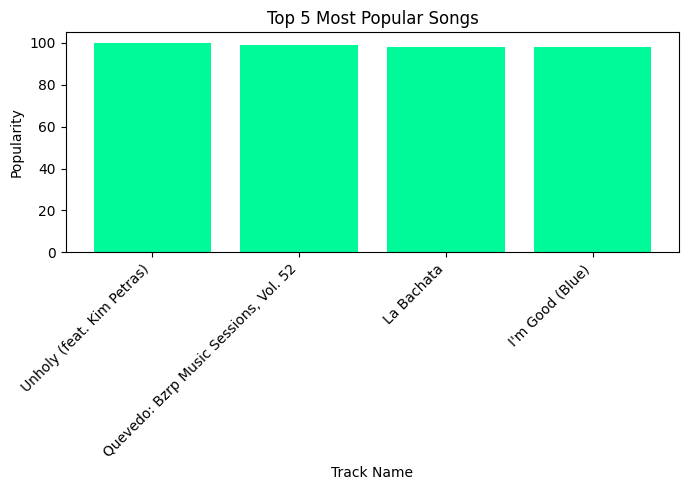

In [30]:
top_songs = df.sort_values(by='popularity', ascending=False).head(5)

plt.figure(figsize=(7, 5))
plt.bar(top_songs['track_name'], top_songs['popularity'], color='mediumspringgreen')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.title('Top 5 Most Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We note that in the graph there are only 4 songs and they are very even, so it is better to look at this information in another way.

In [31]:
top_songs = df.sort_values(by='popularity', ascending=False).head(5)
top_songs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop


The reason why there are only 4 songs is because the first two songs are the same, but they have different genres and that's why it comes out 2 times. 

And we also look at the songs with the lowest level of popularity.

In [32]:
bottom_songs = df.sort_values(by='popularity', ascending=True).head(5)
bottom_songs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
30033,5UsPHCjVvPx2GHtpmIebvu,David Guetta;Avicii,EDM Hits,Sunshine,0,360960,False,0.590,0.800,1,-5.044,0,0.0441,0.000653,0.905000,0.0512,0.210,127.996,4,edm
30375,5QHRON3xuXFOWlXeZU4oVF,Zedd;Alessia Cara,Weekend Baby,Stay,0,210400,False,0.689,0.623,5,-5.025,0,0.0621,0.254000,0.000000,0.1130,0.546,101.998,4,edm
30373,4HGq8ZzrPOtXxNEXN4XGFu,Zedd;Alessia Cara,Beginner Ride (Mixtape Vol. 1),Stay,0,210400,False,0.689,0.623,5,-5.025,0,0.0621,0.254000,0.000000,0.1130,0.546,101.998,4,edm
30371,2MEH84HKs9zYHcA82mVzBy,Zedd;Liam Payne,Fiesta de disfraces vol. II,Get Low,0,204693,False,0.723,0.924,1,-3.518,1,0.0516,0.033200,0.000006,0.0496,0.527,108.009,4,edm
93885,36l84goWrMv0xA85RMIZG0,Oleg Pogudin,Мелодия рассвета / Το μινόρε της αυγής (Deluxe...,Друзья / Οι φίλοι,0,191677,False,0.575,0.191,1,-11.266,0,0.0370,0.703000,0.000000,0.0934,0.569,96.021,4,romance


In order to make it easier to understand and interpret this range of popularity, a decision was made to categorize these values into levels for a better understanding of the data. 

In [33]:
interval_values = [0, 20, 40, 60, 80, 101]  
level_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High'] 

df['popularity_level'] = pd.cut(df['popularity'], bins=interval_values, labels=level_names, right=False)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_level
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,High
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Medium
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Medium
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,High
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Very High


Then a new column called 'popularity level' was created where they were categorized into 5 different levels, which are as follows:

In [34]:
df["popularity_level"].unique()

['High', 'Medium', 'Very High', 'Very Low', 'Low']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [35]:
count_by_category = df['popularity_level'].value_counts().sort_index()
count_by_category

popularity_level
Very Low     31736
Low          33264
Medium       33737
High         13613
Very High     1199
Name: count, dtype: int64

In [36]:
count_by_category.sum()

113549

We verify that the categories were created correctly and we also verify the amount of data there is for each level of popularity. And we also verify that the amount of data corresponds to the general value to verify that all of them were within a range.

### Column duration_ms
This column is the duration of the songs per milliseconds, so we start by observing the maximum and minimum of this column

In [37]:
df['duration_ms'].min(), df['duration_ms'].max()

(8586, 5237295)

As we observed, it is a little difficult to clearly understand the duration of the songs, that is why a new column called `duration_min_sec` will be created where the duration will be in minutes and seconds.

In [38]:
df['duration_min_sec'] = pd.to_datetime(df['duration_ms'], unit='ms').dt.strftime('%M:%S')
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_level,duration_min_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,High,03:50
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Medium,02:29
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Medium,03:30
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,High,03:21
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Very High,03:18


The conversion was well done so we now verify more clearly what the duration range is.

In [39]:
df['duration_min_sec'].min(), df['duration_min_sec'].max()

('00:00', '55:40')

In [40]:
duration_info = df[df['duration_min_sec'] == '55:40']
duration_info

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_level,duration_min_sec
65475,3oj9ZcytkTaovswquxjzo1,Anuradha Paudwal,Gayatri Mantra,Om Bhurbhuwasah,53,3340672,False,0.719,0.466,3,...,0.0417,0.733,0.000002,0.0973,0.812,137.159,4,k-pop,Medium,55:40


### Column explicit
For this column I verified the number of songs that are explicit and those that are not.

In [41]:
explicit_count = df['explicit'].value_counts()
explicit_count

explicit
False    103831
True       9718
Name: count, dtype: int64

It is clear that most of the songs are not explicit and the proportion of the quantity was represented by a pie chart.

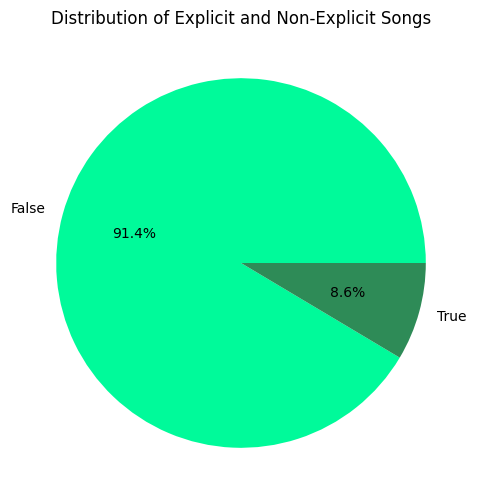

In [42]:
plt.figure(figsize=(6, 6))
plt.pie(explicit_count, labels=explicit_count.index, autopct='%1.1f%%', colors=['mediumspringgreen', 'seagreen'])
plt.title('Distribution of Explicit and Non-Explicit Songs')
plt.show()

This could mean that the public prefers to listen to music that does not contain explicit content, so that is why artists do not have many songs with that content, perhaps these results have to do with platform policies or cultural aspects.

### Column danceability
Danceability is a measure of how likely a song is to be danced to. So let's look at the distribution of the danceability in the dataset.

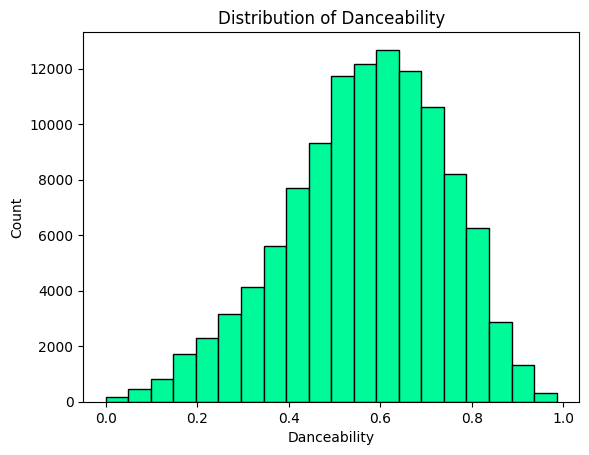

In [43]:
plt.hist(df['danceability'], bins=20, color='mediumspringgreen', edgecolor='black')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title('Distribution of Danceability')
plt.show()

The graph shows that most of the songs have a danceability between 0.4 and 0.6. This means that most of the songs are moderately danceable. There are some songs with very high danceability (above 0.8) and some songs with very low danceability (below 0.2).

then we created a new column called `danceability_category` where a categorization is made to better classify this scale and make it easier to understand and visualize.

In [44]:
percentiles = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High']

df['danceability_category'] = pd.cut(df['danceability'], bins=percentiles, labels=labels, right=False)

count_by_category = df['danceability_category'].value_counts().sort_index()
count_by_category

danceability_category
Very Low     5650
Low         31495
Medium      59499
High        16905
Name: count, dtype: int64

In [45]:
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_level,duration_min_sec,danceability_category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,High,03:50,Medium
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Medium,02:29,Low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Medium,03:30,Low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,High,03:21,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Very High,03:18,Medium


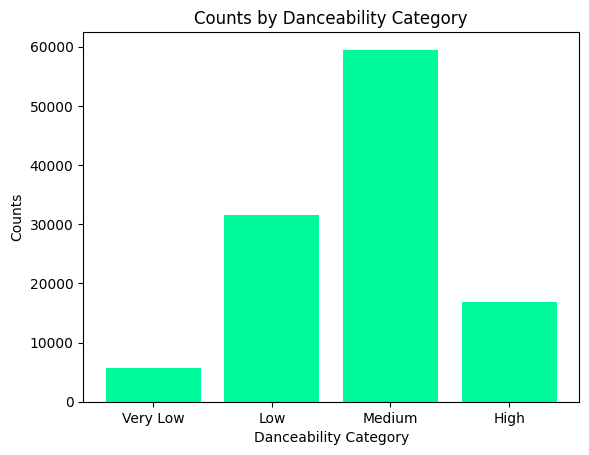

In [46]:
plt.bar(count_by_category.index, count_by_category.values, color='mediumspringgreen')
plt.title('Counts by Danceability Category')
plt.xlabel('Danceability Category')
plt.ylabel('Counts')
plt.show()

- Most of the counts are in the medium bailability category.
- There are fewer counts in the very low and very high bailability categories.
- Danceability can be affected by factors such as rhythm, tempo, and instrumentation.

### Column speechiness
We start by looking at the minimum and maximum in the range and evaluate the distribution of the values. 


In [47]:
df['speechiness'].min(), df['speechiness'].max()

(0.0, 0.965)

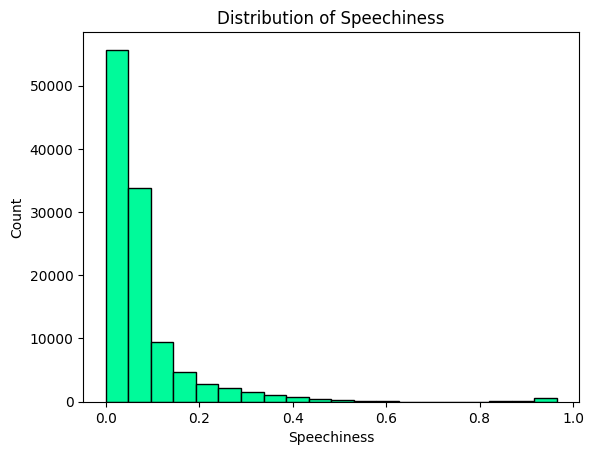

In [48]:
plt.hist(df['speechiness'], bins=20, color='mediumspringgreen', edgecolor='black')
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.title('Distribution of Speechiness')
plt.show()

From this distribution we can say that:
- The data set contains a mixture of songs with different levels of speechiness.
- Most of the songs have a low speechiness value, meaning that they have little or no spoken content.
- There are a significant low number of songs with a medium speechiness value, meaning that they have a moderate amount of spoken content.
- A smaller number of songs have a high speechiness value, meaning that they have a large amount of spoken content.

As we have done before we are going to create a new column called `speechiness_category` where we are going to categorize the values to generate a better and easier understanding of the values. 

In [49]:
speechiness_bins = [0, 0.33, 0.66, 1.0]
speechiness_labels = ['Music Only', 'Music and Speech', 'Speech Only']

df['speechiness_category'] = pd.cut(df['speechiness'], bins=speechiness_bins, labels=speechiness_labels, right=False)


category_counts = df['speechiness_category'].value_counts().sort_index()
category_counts

speechiness_category
Music Only          109947
Music and Speech      2724
Speech Only            878
Name: count, dtype: int64

In [50]:
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_level,duration_min_sec,danceability_category,speechiness_category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.000001,0.3580,0.715,87.917,4,acoustic,High,03:50,Medium,Music Only
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.000006,0.1010,0.267,77.489,4,acoustic,Medium,02:29,Low,Music Only
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.000000,0.1170,0.120,76.332,4,acoustic,Medium,03:30,Low,Music Only
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.000071,0.1320,0.143,181.740,3,acoustic,High,03:21,Low,Music Only
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.000000,0.0829,0.167,119.949,4,acoustic,Very High,03:18,Medium,Music Only


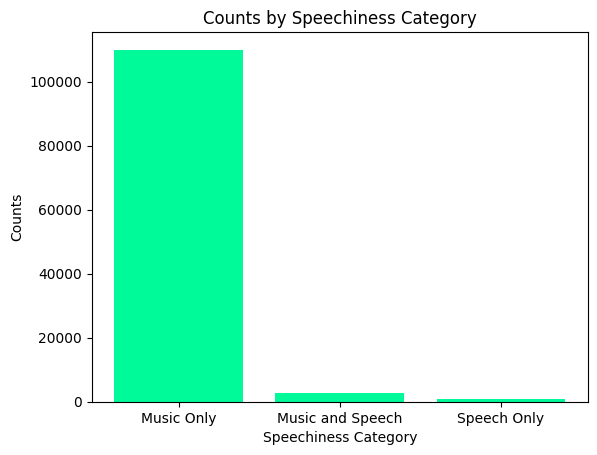

In [51]:
plt.bar(category_counts.index, category_counts.values, color='mediumspringgreen')
plt.title('Counts by Speechiness Category')
plt.xlabel('Speechiness Category')
plt.ylabel('Counts')
plt.show()

- The majority of the songs (about 90%) are from the "Music Only" category.
- A small percentage of the songs (about 2%) are from the "Music and Speech" category.
- An even smaller percentage of the songs (about 0.7%) are from the category "Speech Only".

The dataset is primarily composed of songs that have no spoken content. There are a small number of songs that have a mixture of music and speech. And there are a very small number of songs that are speech only.

### Column valance
This column turns out to be important since it allows us to evaluate the emotions expressed in the songs, allowing to be an important factor at the time of analysis. 

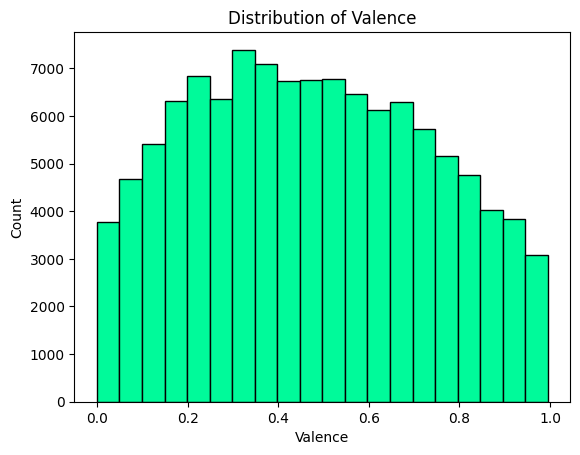

In [52]:
plt.hist(df['valence'], bins=20, color='mediumspringgreen', edgecolor='black')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.title('Distribution of Valence')
plt.show()

The dataset contains a mix of songs with different levels of valence.
- Most of the songs have a high valence value (between 0.4 and 1), meaning that they are perceived as positive and cheerful.
- There are a significant number of songs with a medium valence value (between 0.2 and 0.4), meaning that they are perceived as neutral.
- A smaller number of songs have a low valence value (between 0 and 0.2), meaning that they are perceived as negative and sad.

And as done before this column was also categorized in a new column called `valence_category`, where they are grouped by emotional groups.

In [53]:
valence_bins = [0, 0.25, 0.5, 0.75, 1.0]
valence_labels = ['Sad', 'Neutral', 'Happy', 'Euphoric']

df['valence_category'] = pd.cut(df['valence'], bins=valence_bins, labels=valence_labels, right=False)

valence_category_counts = df['valence_category'].value_counts().sort_index()
valence_category_counts

valence_category
Sad         27147
Neutral     34429
Happy       31423
Euphoric    20550
Name: count, dtype: int64

In [54]:
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,liveness,valence,tempo,time_signature,track_genre,popularity_level,duration_min_sec,danceability_category,speechiness_category,valence_category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.3580,0.715,87.917,4,acoustic,High,03:50,Medium,Music Only,Happy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.1010,0.267,77.489,4,acoustic,Medium,02:29,Low,Music Only,Neutral
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.1170,0.120,76.332,4,acoustic,Medium,03:30,Low,Music Only,Sad
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.1320,0.143,181.740,3,acoustic,High,03:21,Low,Music Only,Sad
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0829,0.167,119.949,4,acoustic,Very High,03:18,Medium,Music Only,Sad


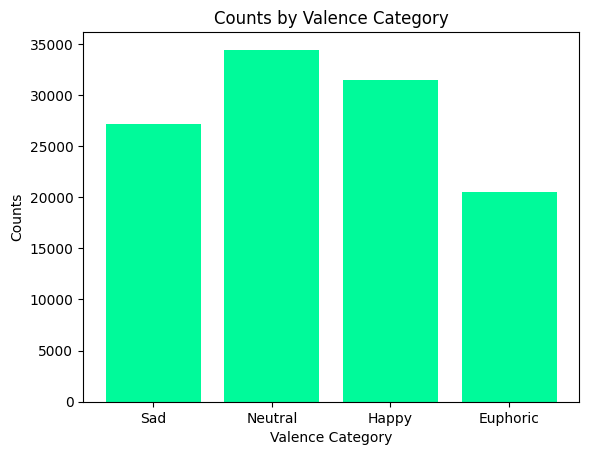

In [55]:
plt.bar(valence_category_counts.index, valence_category_counts.values, color='mediumspringgreen')
plt.title('Counts by Valence Category')
plt.xlabel('Valence Category')
plt.ylabel('Counts')
plt.show()

Sad: Songs with a melancholic or depressive tone.

Neutral: Songs with a neutral tone or without strong emotions.

Happy: Songs with a happy or positive tone.

Euphoric: Songs with an extremely cheerful or festive tone.

- Most of the songs on Spotify have a neutral tone.
- There are a significant number of songs with positive valence (happy and euphoric).
- Sad songs are less common than songs with positive valence.

### Column track genre

We start by checking how many genres there are.

In [56]:
df["track_genre"].nunique()

114

and we also verify what genres there are

In [57]:
df["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

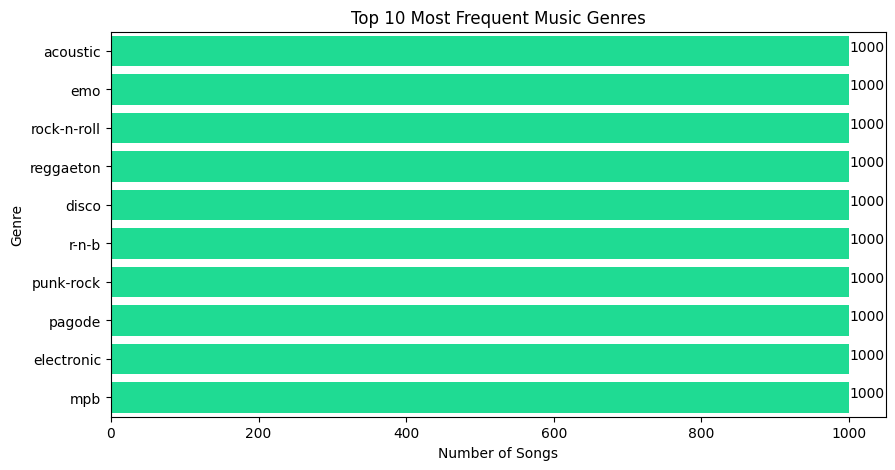

In [58]:
top_10_genres = df['track_genre'].value_counts().head(10)

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=top_10_genres.values, y=top_10_genres.index, color='mediumspringgreen')

for index, value in enumerate(top_10_genres.values):
    bar_plot.text(value, index, str(value))

plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 10 Most Frequent Music Genres')
plt.show()

A bar diagram was made to verify which are the 10 most frequent genres and the information is completely the same and standardized in all the observed genres.

In [59]:
genre_counts = df["track_genre"].value_counts()
print(genre_counts)

track_genre
acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
               ... 
honky-tonk      981
dance           965
german          963
classical       933
romance         904
Name: count, Length: 114, dtype: int64


After observing that the number of values in the genres are very equal, the decision was made to group these genres by category, taking into account their similarity, culture, rhythm, among others.

In [60]:
genre_mapping = {
    'instrumental': ['acoustic', 'classical', 'folk', 'guitar', 'piano', 'singer-songwriter', 'songwriter', 'world-music', 'opera', 'new-age'],
    'electronic': ['afrobeat', 'breakbeat', 'chicago-house', 'club', 'dance', 'deep-house', 'detroit-techno', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'house', 'idm', 'techno', 'minimal-techno', 'trance', 'hardstyle'],
    'rock and metal': ['alt-rock', 'alternative', 'british', 'grunge', 'hard-rock', 'indie', 'metal', 'metalcore', 'punk-rock', 'rock', 'rock-n-roll', 'black-metal', 'death-metal', 'hardcore', 'heavy-metal', 'industrial', 'psych-rock', 'rockabilly', 'goth', 'punk', 'j-rock', 'garage'],
    'pop': ['anime', 'cantopop', 'j-pop', 'k-pop', 'pop', 'power-pop', 'synth-pop', 'indie-pop', 'pop-film'],
    'urban': ['hip-hop', 'j-dance', 'j-idol', 'r-n-b', 'trip-hop'],
    'latino': ['brazil', 'latin', 'latino', 'reggaeton', 'salsa', 'samba', 'spanish', 'pagode', 'sertanejo', 'mpb'],
    'global sounds': ['indian', 'iranian', 'malay', 'mandopop', 'reggae', 'turkish', 'ska', 'dancehall', 'tango'],
    'jazz and soul': ['blues', 'bluegrass', 'funk', 'gospel', 'jazz', 'soul'],
    'varied themes': ['children', 'disney', 'forro', 'grindcore', 'kids', 'party', 'romance', 'show-tunes'],
    'mood': ['ambient', 'chill', 'happy', 'sad', 'sleep', 'study',  'comedy'],
    'single genre': ['country', 'progressive-house', 'swedish', 'emo', 'honky-tonk', 'french', 'german', 'drum-and-bass', 'groove', 'disco']
}

genre_to_category = {genre: category for category, genres in genre_mapping.items() for genre in genres}

df['genre'] = df['track_genre'].map(genre_to_category)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,popularity_level,duration_min_sec,danceability_category,speechiness_category,valence_category,genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.715,87.917,4,acoustic,High,03:50,Medium,Music Only,Happy,instrumental
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.267,77.489,4,acoustic,Medium,02:29,Low,Music Only,Neutral,instrumental
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.120,76.332,4,acoustic,Medium,03:30,Low,Music Only,Sad,instrumental
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.143,181.740,3,acoustic,High,03:21,Low,Music Only,Sad,instrumental
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.167,119.949,4,acoustic,Very High,03:18,Medium,Music Only,Sad,instrumental


In [61]:
df["genre"].nunique()

11

In [62]:
df["genre"].unique()

array(['instrumental', 'electronic', 'rock and metal', 'mood', 'pop',
       'jazz and soul', 'latino', 'varied themes', 'single genre',
       'global sounds', 'urban'], dtype=object)

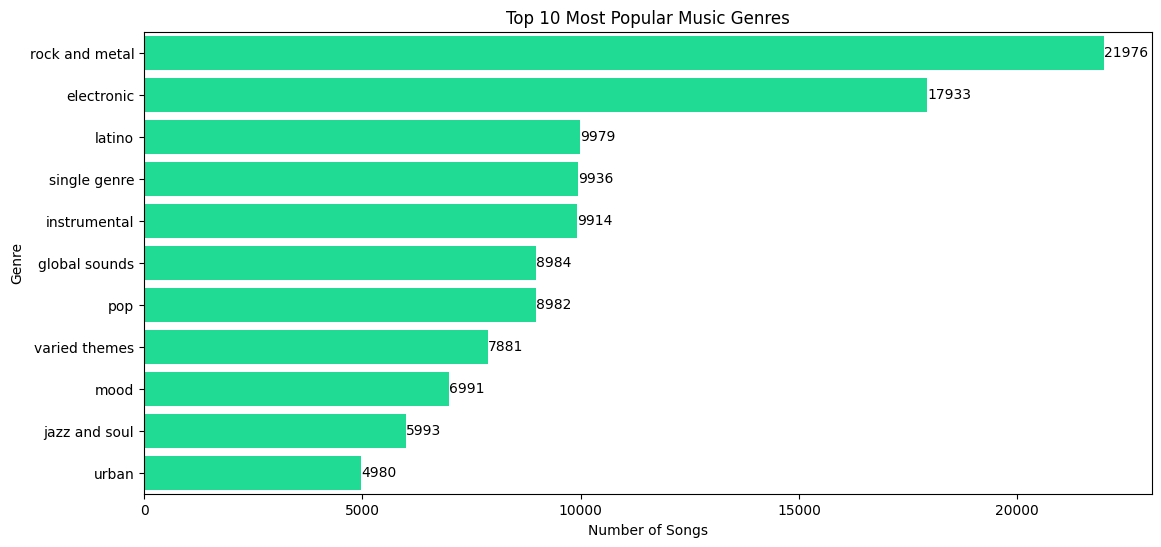

In [63]:
genres_total = df['genre'].value_counts().head(11)

plt.figure(figsize=(13, 6))
sns.barplot(x=genres_total.values, y=genres_total.index, color='mediumspringgreen')

for i, v in enumerate(genres_total.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 10 Most Frequency Music Genres')
plt.show()

We observe that we already have a much more valuable distribution to carry out analyzes and visualizations, this thanks to the grouping into 11 general categories for the genres. And here we can see that the most frequent genre is rock and metal, this may be because it is possibly the group that has the most genres, causing this high level of frequency to be generated.

### Additional Information
We decided to see if there is some kind of relationship between the variables and to give possible conclusions

Average relationship between the variables 'genre' and 'danceability'. 

In [64]:
relation = df.groupby('genre')['danceability'].mean()
relation

genre
electronic        0.643523
global sounds     0.587254
instrumental      0.469326
jazz and soul     0.560806
latino            0.638980
mood              0.529618
pop               0.579015
rock and metal    0.491721
single genre      0.592143
urban             0.642655
varied themes     0.556550
Name: danceability, dtype: float64

The results show whether a song is danceable varies significantly between different music genres. For example, electronic, Latin and urban music tend to have a higher average danceability compared to genres such as instrumental music or rock and metal. Which is quite logical because the genres with higher danceability have components that make them more danceable, such as instrumental or speechiness.

In [65]:
correlation = df['valence'].corr(df['popularity'])
correlation

-0.04109661109347727

Since the correlation is close to zero and negative, it indicates that there is no strong or significant relationship between valence and popularity. In other words, there is no clear trend to suggest that the higher or lower the 'valence' of a song, the higher or lower its overall popularity.

In [66]:
correlation = df['danceability'].corr(df['valence'])
correlation

0.47675537653797145

Since the correlation is close to 0.5, it indicates that there is a moderate tendency: the higher the value of 'valence' (musical positivity), the more likely the song will be perceived as more suitable for dancing (higher 'danceability'). However, this is not a perfect relationship; there is variability and other factors at play.

# References


1. 2nd Annual GRAMMY Awards | GRAMMY.com. (s. f.). https://www.grammy.com/awards/2nd-annual-grammy-awards 

2. Grammy Awards. (2020, 16 septiembre). Kaggle. https://www.kaggle.com/datasets/unanimad/grammy-awards 

3. Maina, S. (2022, 9 noviembre). Regular Expressions (Regex) with Examples in Python and Pandas. Medium. https://towardsdatascience.com/regular-expressions-regex-with-examples-in-python-and-pandas-461228335670 

4. Pandas DataFrame describe() Method. (s. f.). https://www.w3schools.com/python/pandas/ref_df_describe.asp 

5. Python RegEx. (s. f.). https://www.w3schools.com/python/python_regex.asp 

6. Spotify Tracks Dataset. (2022, 22 octubre). Kaggle. https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset 
